### Hypothesis: Income bias based on country of origin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("census.csv")

In [4]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'hours_per_week',
       'native_country', 'greater_than_50k'],
      dtype='object')

In [5]:
country = pd.concat([df[df.greater_than_50k == 1].groupby("native_country").native_country.count(),
                    df[df.greater_than_50k == 0].groupby("native_country").native_country.count()],
                   axis=1, sort=False)

In [6]:
country.columns = ["native_country_gt_50k", "native_country_lt_50k"]
country.columns

Index(['native_country_gt_50k', 'native_country_lt_50k'], dtype='object')

In [14]:
country_calc = country.native_country_gt_50k / (country.native_country_gt_50k + country.native_country_lt_50k)
country_calc.sort_values(ascending=False, inplace=True)
country_calc

 Iran                          0.418605
 France                        0.413793
 India                         0.400000
 Taiwan                        0.392157
 Japan                         0.387097
 Yugoslavia                    0.375000
 Cambodia                      0.368421
 Italy                         0.342466
 England                       0.333333
 Canada                        0.322314
 Germany                       0.321168
 Philippines                   0.308081
 Hong                          0.300000
 Greece                        0.275862
 China                         0.266667
 Cuba                          0.263158
 Scotland                      0.250000
 United-States                 0.245835
 Hungary                       0.230769
 Ireland                       0.208333
 South                         0.200000
 Poland                        0.200000
 Thailand                      0.166667
 Ecuador                       0.142857
 Jamaica                       0.123457


Text(0,0.5,'Percentage of People')

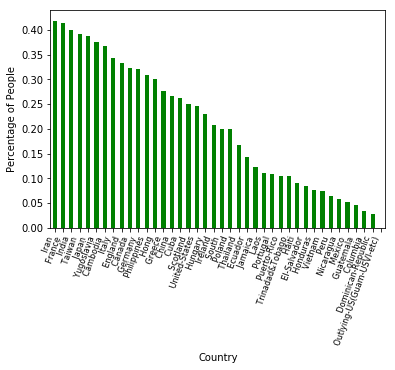

In [13]:
ax = country_calc.plot(kind="bar", color="g")
ax.set_xticklabels(country_calc.index, rotation=70, fontsize=8, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("Percentage of People")

### Conclusion: People from Iran and France are the highest earners compared to those from other nations.